In [1]:
from skimage.io import imread, imshow, imsave

In [2]:
img_a = imread('a.png')

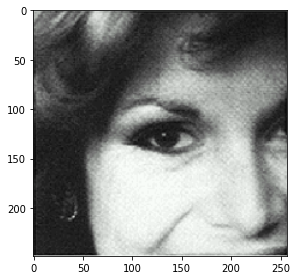

In [3]:
imshow(img_a);

In [4]:
img_a.min(), img_a.max(), img_a.shape 

(7, 252, (249, 257, 3))

In [5]:
import numpy as np

In [6]:
r, g, b = np.dsplit(img_a, 3)

In [7]:
sigma = 0.66

In [8]:
half = round(3 * sigma)

In [9]:
half

2

In [10]:
def mirror(seq, half):
    output = list(seq[::-1][-half:])
    output.extend(seq[:])
    output.extend(seq[-1:-(half + 1):-1])
    return output

In [11]:
def mirroring_border(arr, half):
    arr_mirrored = mirror([mirror(sublist, half) for sublist in arr], half)
    arr_mirrored = np.array(arr_mirrored)
    return arr_mirrored

In [12]:
r_mirrored, g_mirrored, b_mirrored = [mirroring_border(i, half) for i in (r, g, b)]

In [13]:
r_mirrored.shape

(253, 261, 1)

In [14]:
img_a_mirrored = np.dstack((r_mirrored, g_mirrored, b_mirrored))

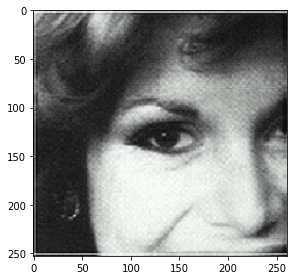

In [15]:
imshow(img_a_mirrored);

In [16]:
imsave('a-mirrored.png', img_a_mirrored)

In [17]:
import math

In [18]:
k = half * 2 + 1

kernel = []
for i in reversed(range(-half, half + 1)):
    for j in range(-half, half + 1):
        kernel.append((j, i))
kernel = (np.array(kernel).reshape(k, k, 2)).tolist()
for i in range(k):
    for j in range(k):
        kernel[i][j] = 1 / (2 * math.pi * sigma ** 2) * \
        math.exp(- (kernel[i][j][0] ** 2 + kernel[i][j][1] ** 2) / (2 * sigma ** 2))
sum = np.array(kernel).sum()
for i in range(k):
    for j in range(k):
        kernel[i][j] = kernel[i][j] / sum

In [29]:
kernel

[[3.7534830879244845e-05,
  0.0011747322122455444,
  0.003702033540019216,
  0.0011747322122455444,
  3.7534830879244845e-05],
 [0.0011747322122455444,
  0.036765738333202104,
  0.11586299840446948,
  0.036765738333202104,
  0.0011747322122455444],
 [0.003702033540019216,
  0.11586299840446948,
  0.36512892186775553,
  0.11586299840446948,
  0.003702033540019216],
 [0.0011747322122455444,
  0.036765738333202104,
  0.11586299840446948,
  0.036765738333202104,
  0.0011747322122455444],
 [3.7534830879244845e-05,
  0.0011747322122455444,
  0.003702033540019216,
  0.0011747322122455444,
  3.7534830879244845e-05]]

In [30]:
type(kernel)

list

In [22]:
from scipy.signal import convolve2d

In [23]:
r_gauss, g_gauss, b_gauss = [(convolve2d(i[: ,: , 0], kernel, mode='valid')).astype('uint8') for i in 
                             (r_mirrored, g_mirrored, b_mirrored)]

In [24]:
r_gauss.shape

(249, 257)

In [25]:
img_a_gauss = np.dstack((r_gauss, g_gauss, b_gauss))

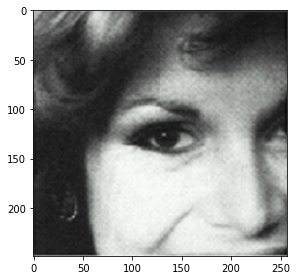

In [27]:
imshow(img_a_gauss);

In [28]:
imsave('a-gauss.png', img_a_gauss)